# Week 9 - Solving nonlinear equations: Fixed point iteration and Newton's method

Charlotte Desvages

## Fixed point iteration

To solve $F(x) = 0$, construct a sequence

$$
x_{k+1} = G(x_k), \qquad k = 0, 1, 2, \dots
$$

$G$ is called the **iteration function**. We choose $G$ such that

$$
F(x_\ast) = 0 \quad \Leftrightarrow \quad x_\ast = G(x_\ast).
$$

### Example

Solve

$$
x - \cos x - 1 = 0.
$$

We can rewrite this as $x = \cos x + 1 = G(x)$, giving the fixed point iteration

$$
x_{k+1} = \cos x_k + 1, \qquad k = 0, 1, 2, \dots
$$

We need an initial guess $x_0$.

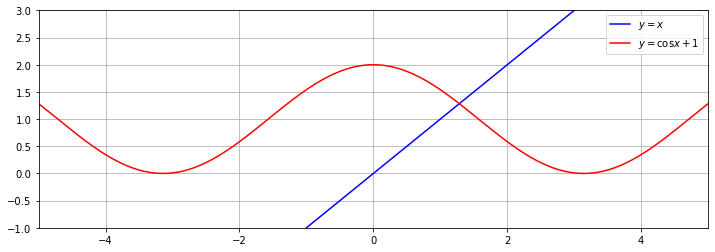

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def G(x):
    return np.cos(x) + 1

fig, ax = plt.subplots(figsize=(12, 4))

x = np.linspace(-5, 5, 500)
ax.plot(x, x, 'b-', label=r'$y = x$')
ax.plot(x, G(x), 'r-', label=r'$y = \cos x + 1$')
ax.set(xlim=[-5, 5], ylim=[-1, 3])
ax.grid(); ax.legend()
plt.show()

In [2]:
x = 1.0
k = 0
tol = 1e-8

while True:
    k += 1
    x_new = np.cos(x) + 1
    
    if abs(x_new - x) <= tol:
        break
    
    x = x_new

print(f'Root = {x_new}, found in {k} iterations')

Root = 1.2834287465703613, found in 423 iterations


## Convergence conditions

There are usually many different ways to rewrite $F(x) = 0$ as $x = G(x)$, but not all of these lead to convergence.

If $G(x)$ is differentiable, the fixed-point iteration $x_{k+1} = G(x_k)$ will converge to a root $x_\ast$ of $F(x)$ if
- $|G'(x)| < 1$ in some neighbourhood of $x_\ast$,
- and either:
    - the initial guess $x_0$ is chosen in this neighbourhood, or
    - some later iteration value $x_k$ is in this neighbourhood.

## Newton's method

Also known as the Newton-Raphson method.

Newton's method is a particular type of fixed-point iteration, where

$$
G(x) = x - \frac{F(x)}{F'(x)}.
$$

In [3]:
def F(x):
    return x - np.cos(x) - 1

def Fp(x):
    return 1 + np.sin(x)

x = 1.0
k = 0
tol = 1e-8

while True:
    k += 1
    x_new = x - F(x) / Fp(x)
    
    if abs(x_new - x) <= tol:
        break
    
    x = x_new

print(f'Root = {x_new}, found in {k} iterations')

Root = 1.2834287417457653, found in 4 iterations


## Convergence of Newton's method

For Newton's method, when $F$ is twice differentiable, we have

$$
G'(x) = 1 - \frac{F'(x)}{F'(x)} + \frac{F(x) F''(x)}{\left(F'(x)\right)^2}
= \frac{F(x) F''(x)}{\left(F'(x)\right)^2}.
$$

Since $F(x_\ast) = 0$ by definition, we have $G'(x_\ast) = 0$.

Therefore, if $G(x)$ is *continuously differentiable* in some neighbourhood of $x_\ast$, we have

$$
\lim_{x \to x_\ast} G'(x) = 0.
$$

Remember that for fixed point iteration, we have

$$
|e_{k+1}| = |G'(\eta)| |e_k|, \qquad \text{for some} \: \eta \in (\min(x_k, x_\ast), \max(x_k, x_\ast)).
$$

Since $\lim_{x \to x_\ast} G'(x) = 0$, then for $\eta$ in this neighbourhood, $|G'(\eta)|$ decreases more and more as we approach the root, and convergence **accelerates**!

To guarantee convergence, it is sufficient that:
- $G(x)$ is continuously differentiable,
- $x_0$ is chosen to be sufficiently close to $x_\ast$, in a neighbourhood where $|G'(x)|<1$.

## Order of convergence: Newton's method